## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [54]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [55]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [56]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [57]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [58]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [59]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [60]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [61]:
df2 = df

In [62]:
df2.drop(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index, axis=0, inplace=True)

In [63]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [64]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [65]:
df2.user_id.count()

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [66]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [67]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [68]:
df2.drop((df2[df2.user_id.duplicated()].index), axis=0, inplace=True)

In [69]:
df2.user_id.count()

290584

In [70]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [71]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [72]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [73]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [74]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [75]:
df2[df2['landing_page'] == 'new_page']['landing_page'].count() / df2.landing_page.count()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> This one feels a bit odd. From the calculations we've done, we can observe that there is a similar probability that an individual given a control or treatment group will convert. Given there is equal probability that individuals received either a control or treatment, I would conclude that there is not sufficient evidence to say that the new treatment page leads to more conversions. In fact, I don't think the page has much influence here... 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> $h_{0}$:  $p_{new}$ $-$ $p_{old}$  $=$ 0

> $h_{1}$:  $p_{new}$ $-$ $p_{old}$  $\gt$ 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [76]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [77]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [78]:
n_new = df2[df2['landing_page'] == "new_page"]['landing_page'].count()
n_new

145310

d. What is $n_{old}$?

In [79]:
n_old = df2[df2['landing_page'] == "old_page"]['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [80]:
new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
new_page_converted

array([1, 1, 1, ..., 0, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [81]:
old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
old_page_converted

array([0, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [82]:
new_page_converted.mean() - old_page_converted.mean()

0.0009999308879088398

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [83]:
p_diffs = []

new_page_converted = np.random.binomial(n_new,p_new,10000)/n_new
old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old
p_diffs = new_page_converted - old_page_converted

p_diffs

array([ 0.00070675,  0.00160851, -0.00155083, ...,  0.00260621,
        0.00206253,  0.00036946])

In [84]:
#This approach took very long to compute, so (with the help of the knowledge forum) I decided to compute it
#by running a quicker biomial random. 

#p_diffs = [] 
#size = df2.shape[0]

#for i in range(10000):
#    samp = df2.sample(size, replace=True)
#    new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
#    old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
#    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

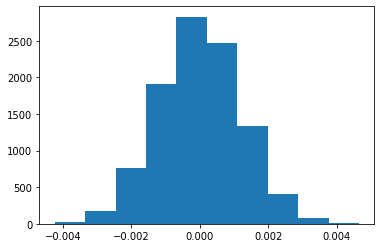

In [85]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [86]:
convert_new = df2[(df2['converted'] == 1) & (df2['landing_page'] == "new_page")]['user_id'].count()
convert_old = df2[(df2['converted'] == 1) & (df2['landing_page'] == "old_page")]['user_id'].count()

cvt_new = convert_new / n_new
cvt_old = convert_old / n_old

cvt_new, cvt_old

(0.11880806551510564, 0.1203863045004612)

In [87]:
obs_diff = cvt_new - cvt_old
obs_diff

-0.0015782389853555567

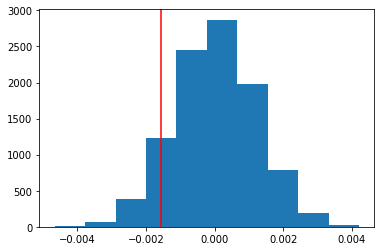

In [88]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

plt.hist(null_vals);
plt.axvline(obs_diff, c='red'); 

In [89]:
(p_diffs > obs_diff).mean()

0.9037

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The value calculated in part j signifies the p-value (the prob. of observing our stat or a stat more extreme than the null) or significance of the test results. Given this number, we can now observe whether we reject, or fail to reject, our null hypothesis. Since this number is well above the standard alpha (0.05) then we `fail to reject` our null hypothesis. This value indicates that there is no significant evidence that we will observe values that rejects our null. In other words, it is unlikely that we will observe a positive difference in the new pages. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [90]:
import statsmodels.api as sm

convert_old = df2[(df2['converted'] == 1) & (df2['landing_page'] == "old_page")]['user_id'].count()
convert_new = df2[(df2['converted'] == 1) & (df2['landing_page'] == "new_page")]['user_id'].count()
n_old = df2[df2['landing_page'] == "old_page"]['landing_page'].count()
n_new = df2[df2['landing_page'] == "new_page"]['landing_page'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [91]:
z_test, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]), alternative='larger')

z_test, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The findings of the proportions z-test help confirm the results found in parts j and k. More specifically, the p-value was found to be greater than 0.05, and therefore encourages us to fail to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic Regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [93]:
df2['intercept'] = 1

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [94]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [95]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:40:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> The `p-value` associated with the `ab_page` is 0.190.

> The null from the previous section assumes that there is no difference between the treatment and control groups. While the previous alternative hypothesis posits that there is a positive difference between the treatment and control groups. 

> Through our logistic regression we assume that the old page is better unless the new page proves to be better at a significance rate of 0.05. Therefore, we are looking more specifically at what causes the treatment and control groups to differ. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Our analysis to this point hasn't been very conclusive. We see little reason to believe that the new page offers anything of benefit, and have yet to uncover what makes our old page successful. To further investigate this data set we can consider the `timestamp` data and explore the differing success rates on different days of the week, or, even more specifically, at different times of the day. 

>Adding additional terms could, however, sour our results and make our investigation more complex. We would need to ensure that the explanatory variables investigated are kept independent (if not, then we would need to add higher order terms to keep our results accurate). 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [96]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [97]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [98]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummies)

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [99]:
### Fit Your Linear Model And Obtain the Results
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results2 = log_mod2.fit()

results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        10:40:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [100]:
np.exp(results2.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [101]:
1/_

intercept    7.614303
ab_page      1.015056
UK           0.950621
US           0.960062
dtype: float64

>**Interpretation:**
<br> The results of the log fit can tell us three thing (depsite its insignificant p-values). 
<br> 1. If we hold all variables constant, for every one unit decrease in `new_page`, convertion is 1.5% more likely to happen. 
<br> 2. If we hold all variables constant, for every one unit increase in `UK`, convertion is 5.1% more likely to happen. 
<br> 3. If we hold all variables constant, for every one unit increase in `US`, convertion is 4.1% more likely to happen. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [102]:
df_new['uk_new_page'] = df_new['ab_page'] * df_new['UK']
df_new['us_new_page'] = df_new['ab_page'] * df_new['US']

In [103]:
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','uk_new_page', 'us_new_page', 'UK', 'US']])
results3 = log_mod3.fit()

results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        10:40:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page        -0.0674      0.052     -1.297      0.195      -0.169       0.034
uk_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
us_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
===============================================================================
"""

In [104]:
np.exp(results3.params)

intercept      0.134794
ab_page        0.934776
uk_new_page    1.081428
us_new_page    1.048001
UK             1.011854
US             1.017682
dtype: float64

In [105]:
1/_

intercept      7.418713
ab_page        1.069775
uk_new_page    0.924703
us_new_page    0.954198
UK             0.988285
US             0.982625
dtype: float64

>**Interpretation:** 
<br> 1. Only the intercept's p-value is less than 0.05, therefore the results are not statistically significant. 
<br> 2. A user who received the `new_page`  1.08 times more likely to lead to a conversion compared to a user who recives the `old_page`. 
<br> 3. A user who received the `new_page` and came from the `UK` is 1.08 times more likely to lead to a conversion compared to a user from `CA` who receives the `new_page`.
<br> 4. A user who received the `new_page` and came from the `US` is 1.05 times more likely to lead to a conversion compared to a user from `CA` who receives the `new_page`.
<br> 5. A user from the `UK` is 1.01 times more likely to lead to a conversion compared to a user from `CA`.
<br> 6. A user from the `US` is 1.02 times more likely to lead to a conversion compared to a user from `CA`.
<br> 7. Despite the coef of the `uk_new_page` and `us_new_page` being greater than the `ab_page`, the results are insignificant due to their great p-values. 


<a id='conclusions'></a>
## Conclusions

> The analysis exectued on the data set set out to investigate whether the performance of the `new_page` was of greater success to the `old_page`. Our dataframe provided us with information on the `timestamp`, `group`, `landing_page` type, and if a `conversion` occured. From here we ran the data through 3 tests: probability, A/B tests, and a final regression analysis where the `country` was introduced as a new variable. 
<br> 
<br>From the outset there was little  evidence that the performance of these two different pages had much difference. Our probability tests saw that the probability of the two different groups leading to conversion were very similar (making it very difficult to not pack up and leave the results as they were). 
<br>
<br>Our A/B tests only confirmed what we had already established in the probability tests: we would fail to reject the null hypothesis. Could it be that the two groups lead to the same proportion of conversions? Or could it be that the new page performed more poorly? 
<br>
<br>Our regression analysis got us closer to having a clear answer. While our probability tests and AB tests showed that we failed to reject the null hypothesis, that is that there is no difference between the new and old (or that the old is better), our first regression test found that the `old_page` actually performed better than the `new_page` given its insignificant p-value. 
<br>
<br>From here we wanted to get a better idea for what other variables could cause or have influence on conversions. And so we introduced the country data to our dataframe. We performed two tests: one that looked at the individual factors of country and page on conversion, and a second that investiated the interaction between country and page. Both of these investigations demonstrated that the country a user lives in has no influence on conversion :(. 
<br>
<br>To conclude, it seems that there is substantial evidence to say that there is very little difference between the `new_page` and `old_page`. If I were the person managing this e-commerce project, I would investigate with different changes on the `new_page` before making any changes.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.